# Importando os pacotes

In [3]:
import pandas as pd
import plotly.express as px
import folium 

# Realizando limpeza dos dados

In [4]:
# Carregando o dataset
df = pd.read_csv('train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [9]:
# Retirada de espaços em branco
df1 = df.copy()

colunas_texto = ['ID', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'City', 'multiple_deliveries']

for coluna in colunas_texto:
    df1[coluna] = df1[coluna].str.strip()


In [10]:
# Removendo linhas com valores inválidos ('NaN' como string) nas colunas
# 'Delivery_person_Age', 'Road_traffic_density' e 'City'
df1 = df1[df1['Delivery_person_Age'] != 'NaN']
df1 = df1[df1['Road_traffic_density'] != 'NaN']
df1 = df1[df1['City'] != 'NaN']

In [11]:
# 4. convertendo multiple_deliveries de texto para numero inteiro (int)
linhas_selecionadas = (df1['multiple_deliveries'] != 'NaN')
df1 = df1.loc[linhas_selecionadas, :].copy()
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype(int)

In [13]:
# Convertendo para tipo data
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], format="%d-%m-%Y")

# Convertendo para tipo numérico
df1['Delivery_person_Age'] = pd.to_numeric(df1['Delivery_person_Age'], errors="coerce")
df1['Delivery_person_Ratings'] = pd.to_numeric(df1['Delivery_person_Ratings'], errors="coerce")

In [14]:
# 7. Limpando a coluna de time taken
df1['Time_taken(min)'] = df1['Time_taken(min)'].apply(lambda x: x.split('(min) ')[1])
df1['Time_taken(min)'] = df1['Time_taken(min)'].astype(int)


# A visão Crescimento: Do lado da empresa

## 1. Quantidade de pedidos por dia.

In [11]:
# Preparando o dataset
coluns = ['ID', 'Order_Date']
df_aux = df1.loc[: , coluns].groupby('Order_Date').count().reset_index()
df_aux


,Order_Date,ID
0,2022-02-11,970
1,2022-02-12,864
2,2022-02-13,957
3,2022-02-14,851
4,2022-02-15,945
5,2022-02-16,861
6,2022-02-17,939
7,2022-02-18,855
8,2022-03-01,1140
9,2022-03-02,1012


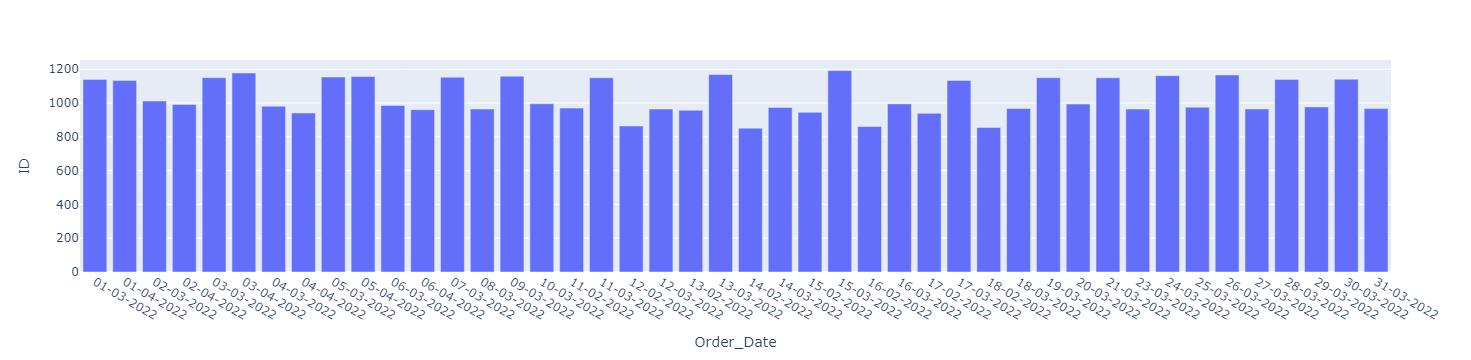

In [9]:
# Fazendo o gráfico

px.bar(df_aux, x='Order_Date', y='ID')

## 2. Quantidade de pedidos por semana.

In [29]:
df1['Week_of_year'] = df1['Order_Date'].dt.strftime("%U")
coluns = ['Week_of_year' , 'ID']
df_aux = df1.loc[: , coluns].groupby('Week_of_year').count().reset_index()

px.line(df_aux , x='Week_of_year', y='ID')

## 3. Distribuição dos pedidos por tipo de tráfego.


In [24]:
columns = ['ID', 'Road_traffic_density']
df_aux = df1.loc[:, columns].groupby( 'Road_traffic_density' ).count().reset_index()
df_aux['perc_ID'] = 100 * ( df_aux['ID'] / df_aux['ID'].sum() )

# Gerando o gráfico
px.pie( df_aux, values='perc_ID', names='Road_traffic_density' )

## 4. Comparação do volume de pedidos por cidade e tipo de tráfego.


In [30]:
coluns = ['ID', 'City' , 'Road_traffic_density']
df_aux = df1.loc[: , coluns].groupby(['City' , 'Road_traffic_density']).count().reset_index()
fig = px.scatter(
    df_aux,         # DataFrame com os dados
    x='Road_traffic_density',       # eixo X
    y='City',       # eixo Y
    size='ID', # determina o tamanho das bolhas
)
fig.show()

## 5. A quantidade de pedidos por entregador por semana.

In [15]:
df1['Week_of_year'] = df1['Order_Date'].dt.strftime("%U")
df_aux1 = df1.loc[: , ['Week_of_year' , 'ID']].groupby('Week_of_year').count().reset_index()
df_aux2 = df1.loc[: , ['Week_of_year', 'Delivery_person_ID']].groupby('Week_of_year').nunique().reset_index()
df_aux =  pd.merge(df_aux1 , df_aux2, how='inner')
df_aux['order_by_delivery'] = df_aux['ID'] / df_aux['Delivery_person_ID']

# Gerando o gráfico
fig = px.line(
    df_aux,     # DataFrame com os dados
    x="Week_of_year",   # eixo X
    y="order_by_delivery",   # eixo Y
)
fig.show()

## 6. A localização central de cada cidade por tipo de tráfego.

In [32]:
coluns = ['City','Road_traffic_density','Restaurant_latitude','Restaurant_longitude']
df_aux = df1.loc[: , coluns].groupby(['City','Road_traffic_density']).median().reset_index()
df_aux

,City,Road_traffic_density,Restaurant_latitude,Restaurant_longitude
0,Metropolitian,High,18.539299,76.293136
1,Metropolitian,Jam,18.563934,75.902847
2,Metropolitian,Low,18.551440,75.898497
3,Metropolitian,Medium,18.554382,75.902847
4,Semi-Urban,High,20.423478,76.784976
5,Semi-Urban,Jam,17.434965,76.618496
6,Semi-Urban,Medium,21.160234,77.661931
7,Urban,High,18.569156,75.892471
8,Urban,Jam,18.562450,75.893106
9,Urban,Low,18.551440,75.892574


In [ ]:
columns = [
'City',
'Road_traffic_density',
'Delivery_location_latitude',
'Delivery_location_longitude'
]
columns_groupby = ['City', 'Road_traffic_density']
data_plot = df1.loc[:, columns].groupby( columns_groupby ).median().reset_index()
data_plot = data_plot[data_plot['City'] != 'NaN']
data_plot = data_plot[data_plot['Road_traffic_density'] != 'NaN']
# Desenhar o mapa
map_ = folium.Map( zoom_start=11 )
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['Delivery_location_latitude'],
location_info['Delivery_location_longitude']],
popup=location_info[['City', 'Road_traffic_density']] ).add_to( map_ )
map_

# 2.0 - Visão: Entregadores 